#data preprocessing

In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

#read in training data
train_df = pd.read_csv('reaction_parameters_spectrum_data_1.csv',names = ["1", "2", "3", "4","5","6","7","peak"])
train_df.head()

,1,2,3,4,5,6,7,peak
0,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.390802
1,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.374682
2,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.404722
3,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.435860
4,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.465058


In [0]:
spectrum=pd.read_csv("spectrum.csv")
spectrum.head()

,lambda (nm),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084
0,393.350000,0.390802,0.303440,0.292945,0.272368,0.263839,0.281098,0.197114,0.202965,0.184783,0.175462,0.173015,0.175937,0.164948,0.164976,0.153708,0.167623,0.154999,0.156864,0.160135,0.135740,0.143362,0.134209,0.132814,0.126884,0.146322,0.141984,0.139400,0.122761,0.119960,0.133633,0.133320,0.095954,0.105189,0.126030,0.131317,0.093031,0.125055,0.119289,0.115904,...,0.214624,0.112481,0.150678,0.162131,0.143485,0.143613,0.101470,0.129917,0.126057,0.138306,0.123354,0.123856,0.136760,0.142529,0.143554,0.121423,0.128030,0.162039,0.156327,0.121654,0.155897,0.145164,0.145392,0.134318,0.147462,0.125991,0.113799,0.095424,0.078016,0.106660,0.103497,0.081421,0.121780,0.089722,0.119905,0.092847,0.065551,0.078842,0.124088,0.066957
1,395.474482,0.374682,0.315318,0.327117,0.314470,0.289877,0.276256,0.232364,0.179346,0.188200,0.189622,0.200679,0.199725,0.184847,0.175432,0.161890,0.169476,0.136743,0.165281,0.160538,0.141211,0.156533,0.155206,0.161316,0.172900,0.149389,0.098321,0.149631,0.147451,0.130602,0.093935,0.108171,0.127945,0.116257,0.114511,0.103905,0.115261,0.111110,0.126452,0.099123,...,0.181930,0.174501,0.158254,0.176602,0.153903,0.156017,0.139540,0.167207,0.140298,0.165744,0.169283,0.163454,0.146279,0.165872,0.171019,0.154284,0.143775,0.169130,0.161620,0.172691,0.180651,0.173380,0.160953,0.168096,0.154509,0.112711,0.123352,0.079004,0.096647,0.121445,0.117149,0.094650,0.106109,0.111729,0.101835,0.134451,0.082439,0.088549,0.097845,0.071411
2,397.598963,0.404722,0.358728,0.360658,0.346149,0.311824,0.323855,0.228623,0.207372,0.224982,0.214951,0.217953,0.218775,0.185928,0.206487,0.179767,0.176957,0.154535,0.191823,0.160068,0.151440,0.164479,0.148045,0.159628,0.159885,0.148838,0.131069,0.149560,0.173474,0.141816,0.152700,0.151686,0.134758,0.135371,0.142092,0.121282,0.102730,0.133475,0.121954,0.125197,...,0.201425,0.185975,0.189224,0.183383,0.186192,0.182482,0.154836,0.182700,0.161606,0.177875,0.178786,0.173191,0.176961,0.179227,0.185735,0.175718,0.167593,0.170027,0.171474,0.171268,0.196315,0.208406,0.205710,0.195696,0.181738,0.150812,0.141020,0.111194,0.123303,0.133172,0.151338,0.145249,0.115695,0.109937,0.127502,0.142906,0.109919,0.121163,0.111681,0.073718
3,399.723445,0.435860,0.376827,0.379361,0.365108,0.334674,0.301681,0.250245,0.228544,0.242873,0.232953,0.242436,0.228419,0.226765,0.212083,0.180411,0.186392,0.175874,0.194662,0.187288,0.162173,0.196791,0.188498,0.168453,0.142015,0.154846,0.138797,0.160185,0.185019,0.163253,0.124972,0.125672,0.120298,0.132476,0.142716,0.141025,0.132352,0.118634,0.136017,0.142509,...,0.204627,0.222075,0.215887,0.214118,0.200388,0.213016,0.163379,0.186092,0.175591,0.184757,0.191578,0.196667,0.186863,0.192604,0.182072,0.206737,0.184707,0.203207,0.201013,0.207170,0.217566,0.215805,0.217227,0.216243,0.187786,0.163025,0.133416,0.118768,0.131326,0.145696,0.133723,0.134543,0.135527,0.114751,0.123143,0.118927,0.114381,0.097309,0.122269,0.112021
4,401.847926,0.465058,0.395044,0.388509,0.372549,0.357674,0.323229,0.264870,0.234236,0.251050,0.237514,0.246529,0.234685,0.220337,0.230850,0.205646,0.201193,0.188258,0.186756,0.177284,0.178606,0.199514,0.182950,0.170602,0.168709,0.168892,0.161301,0.169875,0.173273,0.152346,0.126344,0.163858,0.152895,0.131509,0.151958,0.146295,0.127243,0.136460,0.152955,0.118491,...,0.225865,0.222108,0.234268,0.231754,0.211651,0.228954,0.186854,0.200644,0.202534,0.204125,0.210004,0.225384,0.223416,0.230591,0.210062,0.226116,0.213316,0.216931,0.234839,0.219869,0.214668,0.223776,0.228206,0.227944,0.213585,0.167344,0.167510,0.132444,0.133729,0.161853,0.153137,0.153669,0.137569,0.124748,0.135822,0.151236,0.116635,0.121437,0.118462,0.110600


In [0]:
spectrum['lambda (nm)'].values

array([393.35     , 395.4744816, 397.5989632, 399.7234448, 401.8479264,
       403.972408 , 406.0968896, 408.2213712, 410.3458528, 412.4703344,
       414.5948161, 416.7192977, 418.8437793, 420.9682609, 423.0927425,
       425.2172241, 427.3417057, 429.4661873, 431.5906689, 433.7151505,
       435.8396321, 437.9641137, 440.0885953, 442.2130769, 444.3375585,
       446.4620401, 448.5865217, 450.7110033, 452.8354849, 454.9599666,
       457.0844482, 459.2089298, 461.3334114, 463.457893 , 465.5823746,
       467.7068562, 469.8313378, 471.9558194, 474.080301 , 476.2047826,
       478.3292642, 480.4537458, 482.5782274, 484.702709 , 486.8271906,
       488.9516722, 491.0761538, 493.2006355, 495.3251171, 497.4495987,
       499.5740803, 501.6985619, 503.8230435, 505.9475251, 508.0720067,
       510.1964883, 512.3209699, 514.4454515, 516.5699331, 518.6944147,
       520.8188963, 522.9433779, 525.0678595, 527.1923411, 529.3168227,
       531.4413043, 533.565786 , 535.6902676, 537.8147492, 539.9

In [0]:
import numpy as np
a = spectrum['lambda (nm)'].values
data=np.tile(a, 1084)

In [0]:
data.reshape(-1,1)

data1=pd.DataFrame(data=data.reshape(-1,1),    # values
           index=None,    # 1st column as index
           columns=None)  # 1st row as the column names

In [0]:
data1

,0
0,393.350000
1,395.474482
2,397.598963
3,399.723445
4,401.847926
5,403.972408
6,406.096890
7,408.221371
8,410.345853
9,412.470334


In [0]:
train_df1=pd.concat([train_df,data1],axis=1)

In [0]:
train_df1.head()

,1,2,3,4,5,6,7,peak,0
0,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.390802,393.350000
1,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.374682,395.474482
2,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.404722,397.598963
3,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.435860,399.723445
4,70.0,50.0,5.0,25.0,0.393,12.5,1.29,0.465058,401.847926


In [0]:
train_df1.to_csv('train_df1.csv', sep='\t')

In [0]:
target = 'peak'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df1)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.10f}".format(scaler.scale_[7], scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_train, columns=train_df1.columns.values)

Note: median values were scaled by multiplying by 1.1876484617 and adding 0.0310405191


In [0]:
scaled_train_df.shape

(221136, 9)

In [0]:
X = scaled_train_df.drop(target, axis=1).values
Y = scaled_train_df[[target]].values

In [0]:
import numpy as np
X_fitting = np.vstack((X[0:600*204],X[700*204:1084:204]))
Y_fitting = np.vstack((Y[0:600*204],Y[700*204:1084:204]))

#General NN

In [0]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#build our model
model = Sequential()
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
# Train the model
model.fit(
    X_fitting,
    Y_fitting,
    batch_size=102,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 5s - loss: 0.0244
Epoch 2/100
 - 5s - loss: 0.0203
Epoch 3/100
 - 5s - loss: 0.0196
Epoch 4/100
 - 5s - loss: 0.0188
Epoch 5/100
 - 5s - loss: 0.0182
Epoch 6/100
 - 5s - loss: 0.0152
Epoch 7/100
 - 5s - loss: 0.0088
Epoch 8/100
 - 5s - loss: 0.0070
Epoch 9/100
 - 5s - loss: 0.0053
Epoch 10/100
 - 5s - loss: 0.0045
Epoch 11/100
 - 5s - loss: 0.0041
Epoch 12/100
 - 5s - loss: 0.0039
Epoch 13/100
 - 5s - loss: 0.0038
Epoch 14/100
 - 5s - loss: 0.0037
Epoch 15/100
 - 5s - loss: 0.0036
Epoch 16/100
 - 5s - loss: 0.0035
Epoch 17/100
 - 5s - loss: 0.0035
Epoch 18/100
 - 5s - loss: 0.0034
Epoch 19/100
 - 5s - loss: 0.0034
Epoch 20/100
 - 5s - loss: 0.0033
Epoch 21/100
 - 5s - loss: 0.0033
Epoch 22/100
 - 5s - loss: 0.0032
Epoch 23/100
 - 5s - loss: 0.0032
Epoch 24/100
 - 5s - loss: 0.0031
Epoch 25/100
 - 5s - loss: 0.0031
Epoch 26/100
 - 5s - loss: 0.0030
Epoch 27/100
 - 5s - loss: 0.0029
Epoch 28/100
 - 5s - loss: 0.0028
Epoch 29/100
 - 5s - loss: 0.0027
Epoch 30/100
 - 5s - lo

In [0]:
#inference
prediction = model.predict(X)

In [0]:
prediction-=added
prediction/=multiplied_by

In [0]:
prediction.shape

(221136, 1)

In [0]:
train_df1[204*500:204*501]['peak']

102000    0.257489
102001    0.278989
102002    0.320062
102003    0.341862
102004    0.379665
102005    0.394619
102006    0.401451
102007    0.409387
102008    0.415857
102009    0.425876
102010    0.430435
102011    0.430156
102012    0.440719
102013    0.439150
102014    0.436714
102015    0.447145
102016    0.441207
102017    0.439634
102018    0.434565
102019    0.424213
102020    0.417492
102021    0.417438
102022    0.410375
102023    0.405472
102024    0.394431
102025    0.383615
102026    0.381199
102027    0.377971
102028    0.366404
102029    0.358950
            ...   
102174    0.067828
102175    0.067263
102176    0.062318
102177    0.060817
102178    0.059501
102179    0.056023
102180    0.058473
102181    0.050701
102182    0.053844
102183    0.056475
102184    0.052654
102185    0.054461
102186    0.058196
102187    0.049342
102188    0.061938
102189    0.054306
102190    0.048360
102191    0.061251
102192    0.047924
102193    0.047846
102194    0.049479
102195    0.

In [0]:
import numpy as np
result = np.savetxt('result6_1.csv', prediction, delimiter =', ', header='hydrogen_storage') 

In [0]:
prediction.shape

(20400, 1)

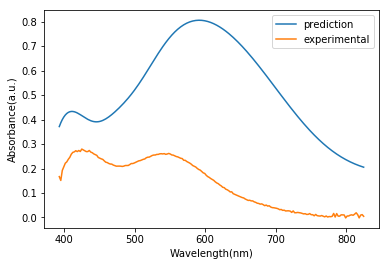

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = spectrum['lambda (nm)'].values
y = prediction[204*1002:204*1003]
y1=train_df1[204*1002:204*1003]['peak'].values
plt.plot(x, y,label='prediction')

plt.plot(x,y1,label='experimental')
plt.legend(loc='upper right')

plt.xlabel('Wavelength(nm)')
plt.ylabel('Absorbance(a.u.)')
plt.show()

# CNN

In [0]:
X = scaled_train_df.drop(target, axis=1).values
Y = scaled_train_df[[target]].values

In [0]:
X_fitting = np.vstack((X[0:600*204],X[700*204:1084*204]))
Y_fitting = np.vstack((Y[0:600*204],Y[700*204:1084*204]))

In [0]:
X.shape

(221136, 8)

In [0]:
Y_fitting.shape

(200736, 1)

In [0]:
df_cnn=X_fitting.reshape(984,1,204,8)
y_cnn=Y_fitting.reshape(984,204)

In [0]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

# Another way to build your CNN
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 204, 8),
    filters=32,
    kernel_size=5,
    strides=2,
    padding='same',     # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=2, padding='same', data_format='channels_first'))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(204))
model.add(Activation('sigmoid'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='mean_squared_error',
             )

print('Training ------------')
# Another way to train the model
model.fit(df_cnn, y_cnn, epochs=100, batch_size=10,validation_split=0.01)

Training ------------
Train on 974 samples, validate on 10 samples
Epoch 1/100
974/974 [==============================] - 1s 1ms/step - loss: 0.0424 - val_loss: 0.0472
Epoch 2/100
974/974 [==============================] - 1s 784us/step - loss: 0.0205 - val_loss: 0.0195
Epoch 3/100
974/974 [==============================] - 1s 799us/step - loss: 0.0069 - val_loss: 0.0091
Epoch 4/100
974/974 [==============================] - 1s 773us/step - loss: 0.0040 - val_loss: 0.0074
Epoch 5/100
974/974 [==============================] - 1s 791us/step - loss: 0.0030 - val_loss: 0.0055
Epoch 6/100
974/974 [==============================] - 1s 774us/step - loss: 0.0026 - val_loss: 0.0096
Epoch 7/100
974/974 [==============================] - 1s 771us/step - loss: 0.0023 - val_loss: 0.0062
Epoch 8/100
974/974 [==============================] - 1s 776us/step - loss: 0.0022 - val_loss: 0.0056
Epoch 9/100
974/974 [==============================] - 1s 766us/step - loss: 0.0020 - val_loss: 0.0052
Epoch 10

In [0]:
a=model.predict(X[600*204:700*204].reshape(100,1,204,8))

In [0]:
a-=added
a/=multiplied_by

In [0]:
a[0]

array([0.23453552, 0.2568655 , 0.2658154 , 0.29621243, 0.32715005,
       0.34489354, 0.36278293, 0.3756763 , 0.39439532, 0.41041657,
       0.3988273 , 0.42304194, 0.43360972, 0.4353519 , 0.4358809 ,
       0.44034535, 0.44045386, 0.43493247, 0.44322246, 0.44050863,
       0.44628158, 0.43785587, 0.44061744, 0.4290462 , 0.4374086 ,
       0.42325312, 0.4193537 , 0.4152928 , 0.40672427, 0.40308845,
       0.40356204, 0.39154527, 0.3917127 , 0.3878492 , 0.37080795,
       0.3815483 , 0.37090033, 0.37281224, 0.36905196, 0.3681206 ,
       0.36561576, 0.36991024, 0.36618045, 0.35781738, 0.36291993,
       0.36019263, 0.3601238 , 0.36183065, 0.35886365, 0.36046046,
       0.3647767 , 0.3523911 , 0.35170245, 0.3585078 , 0.35823786,
       0.34671035, 0.3470998 , 0.34811494, 0.34949303, 0.35123527,
       0.34200373, 0.3433554 , 0.3375433 , 0.33588973, 0.33205652,
       0.3329137 , 0.3227857 , 0.3277438 , 0.29936427, 0.31382856,
       0.30435163, 0.29169306, 0.29079774, 0.2918036 , 0.28837

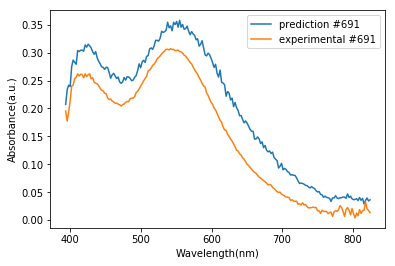

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = spectrum['lambda (nm)'].values
y = a[80]
y1=train_df1[204*680:204*681]['peak'].values
plt.plot(x, y,label='prediction #691')

plt.plot(x,y1,label='experimental #691')
plt.legend(loc='upper right')

plt.xlabel('Wavelength(nm)')
plt.ylabel('Absorbance(a.u.)')


plt.show()